In [2]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
# Load dataset
dataset = pd.read_csv('Price.csv')

In [178]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     23093 non-null  float64
 8   Max Price     23093 non-null  float64
 9   Modal Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


<Axes: >

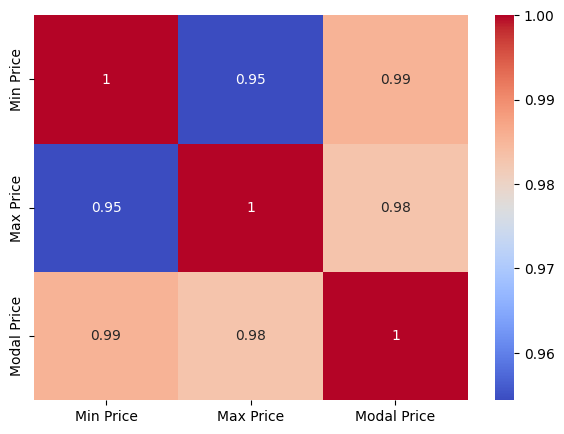

In [179]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7, 5)
numeric_dataset = dataset.select_dtypes(include=["float"])  # Keep only numbers
sns.heatmap(data=numeric_dataset.corr(), annot=True, cmap="coolwarm")


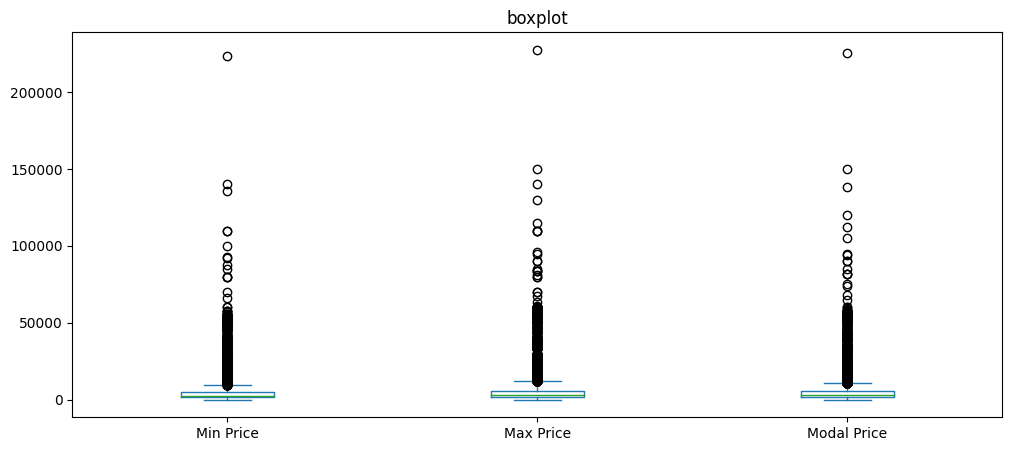

In [180]:
matplotlib.rcParams['figure.figsize'] = (12, 5)
ax = dataset[['Min Price', 'Max Price', 'Modal Price']].plot(kind='box', title='boxplot')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Min Price', ylabel='Count'>

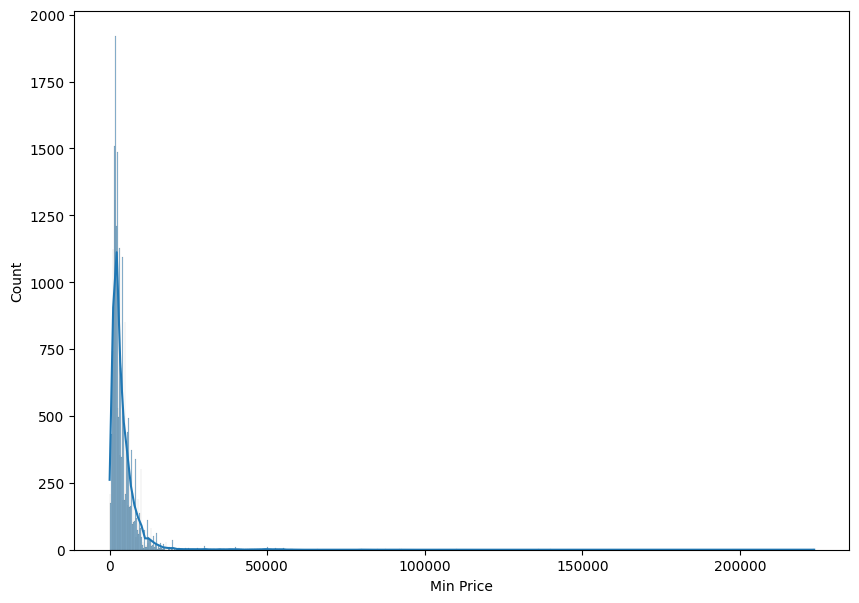

In [181]:
matplotlib.rcParams['figure.figsize'] = (10, 7)
sns.histplot(data=dataset,x=dataset['Min Price'],kde=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Max Price', ylabel='Count'>

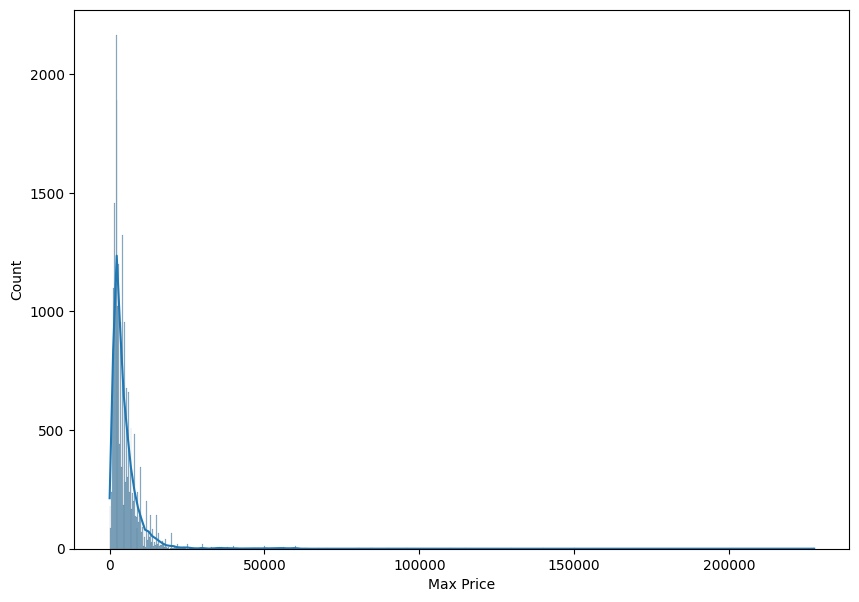

In [182]:
matplotlib.rcParams['figure.figsize'] = (10, 7)
sns.histplot(data=dataset,x=dataset['Max Price'],kde=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Kerala'),
  Text(2, 0, 'Gujarat'),
  Text(3, 0, 'Maharashtra'),
  Text(4, 0, 'Punjab'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Telangana'),
  Text(8, 0, 'West Bengal'),
  Text(9, 0, 'Odisha'),
  Text(10, 0, 'Rajasthan'),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Uttrakhand'),
  Text(14, 0, 'Tripura'),
  Text(15, 0, 'Tamil Nadu'),
  Text(16, 0, 'Nagaland'),
  Text(17, 0, 'Chattisgarh'),
  Text(18, 0, 'Jammu and Kashmir'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'NCT of Delhi'),
  Text(21, 0, 'Andhra Pradesh'),
  Text(22, 0, 'Chandigarh'),
  Text(23, 0, 'Bihar'),
  Text(24, 0, 'Pondicherry'),
  Text(25, 0, 'Goa'),
  Text(26, 0, 'Andaman and Nicobar')])

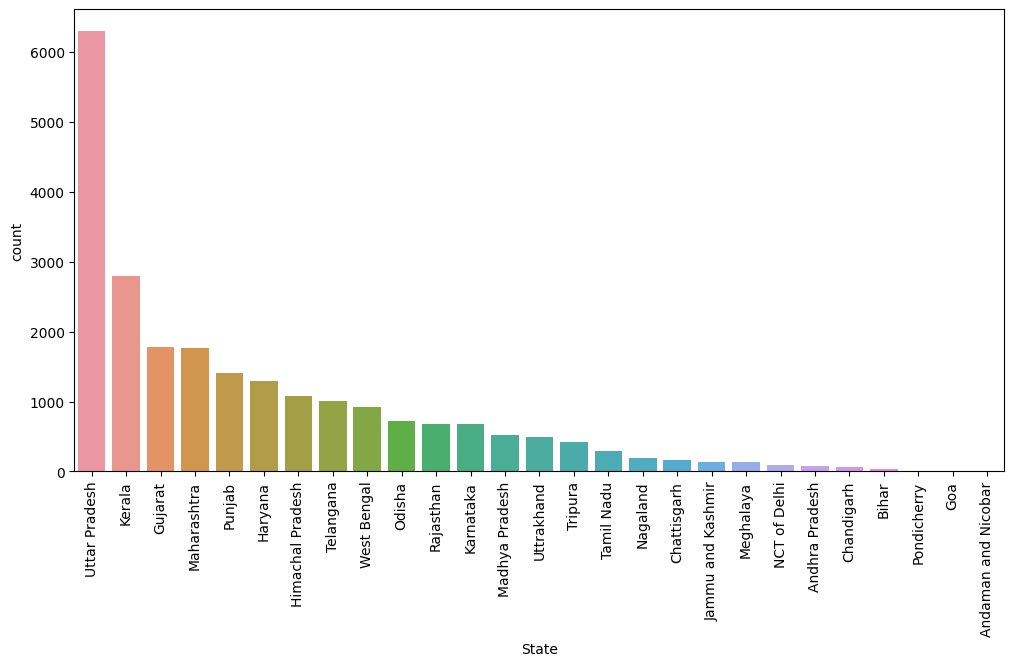

In [183]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.countplot(x=dataset["State"],order=dataset.State.value_counts().index)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

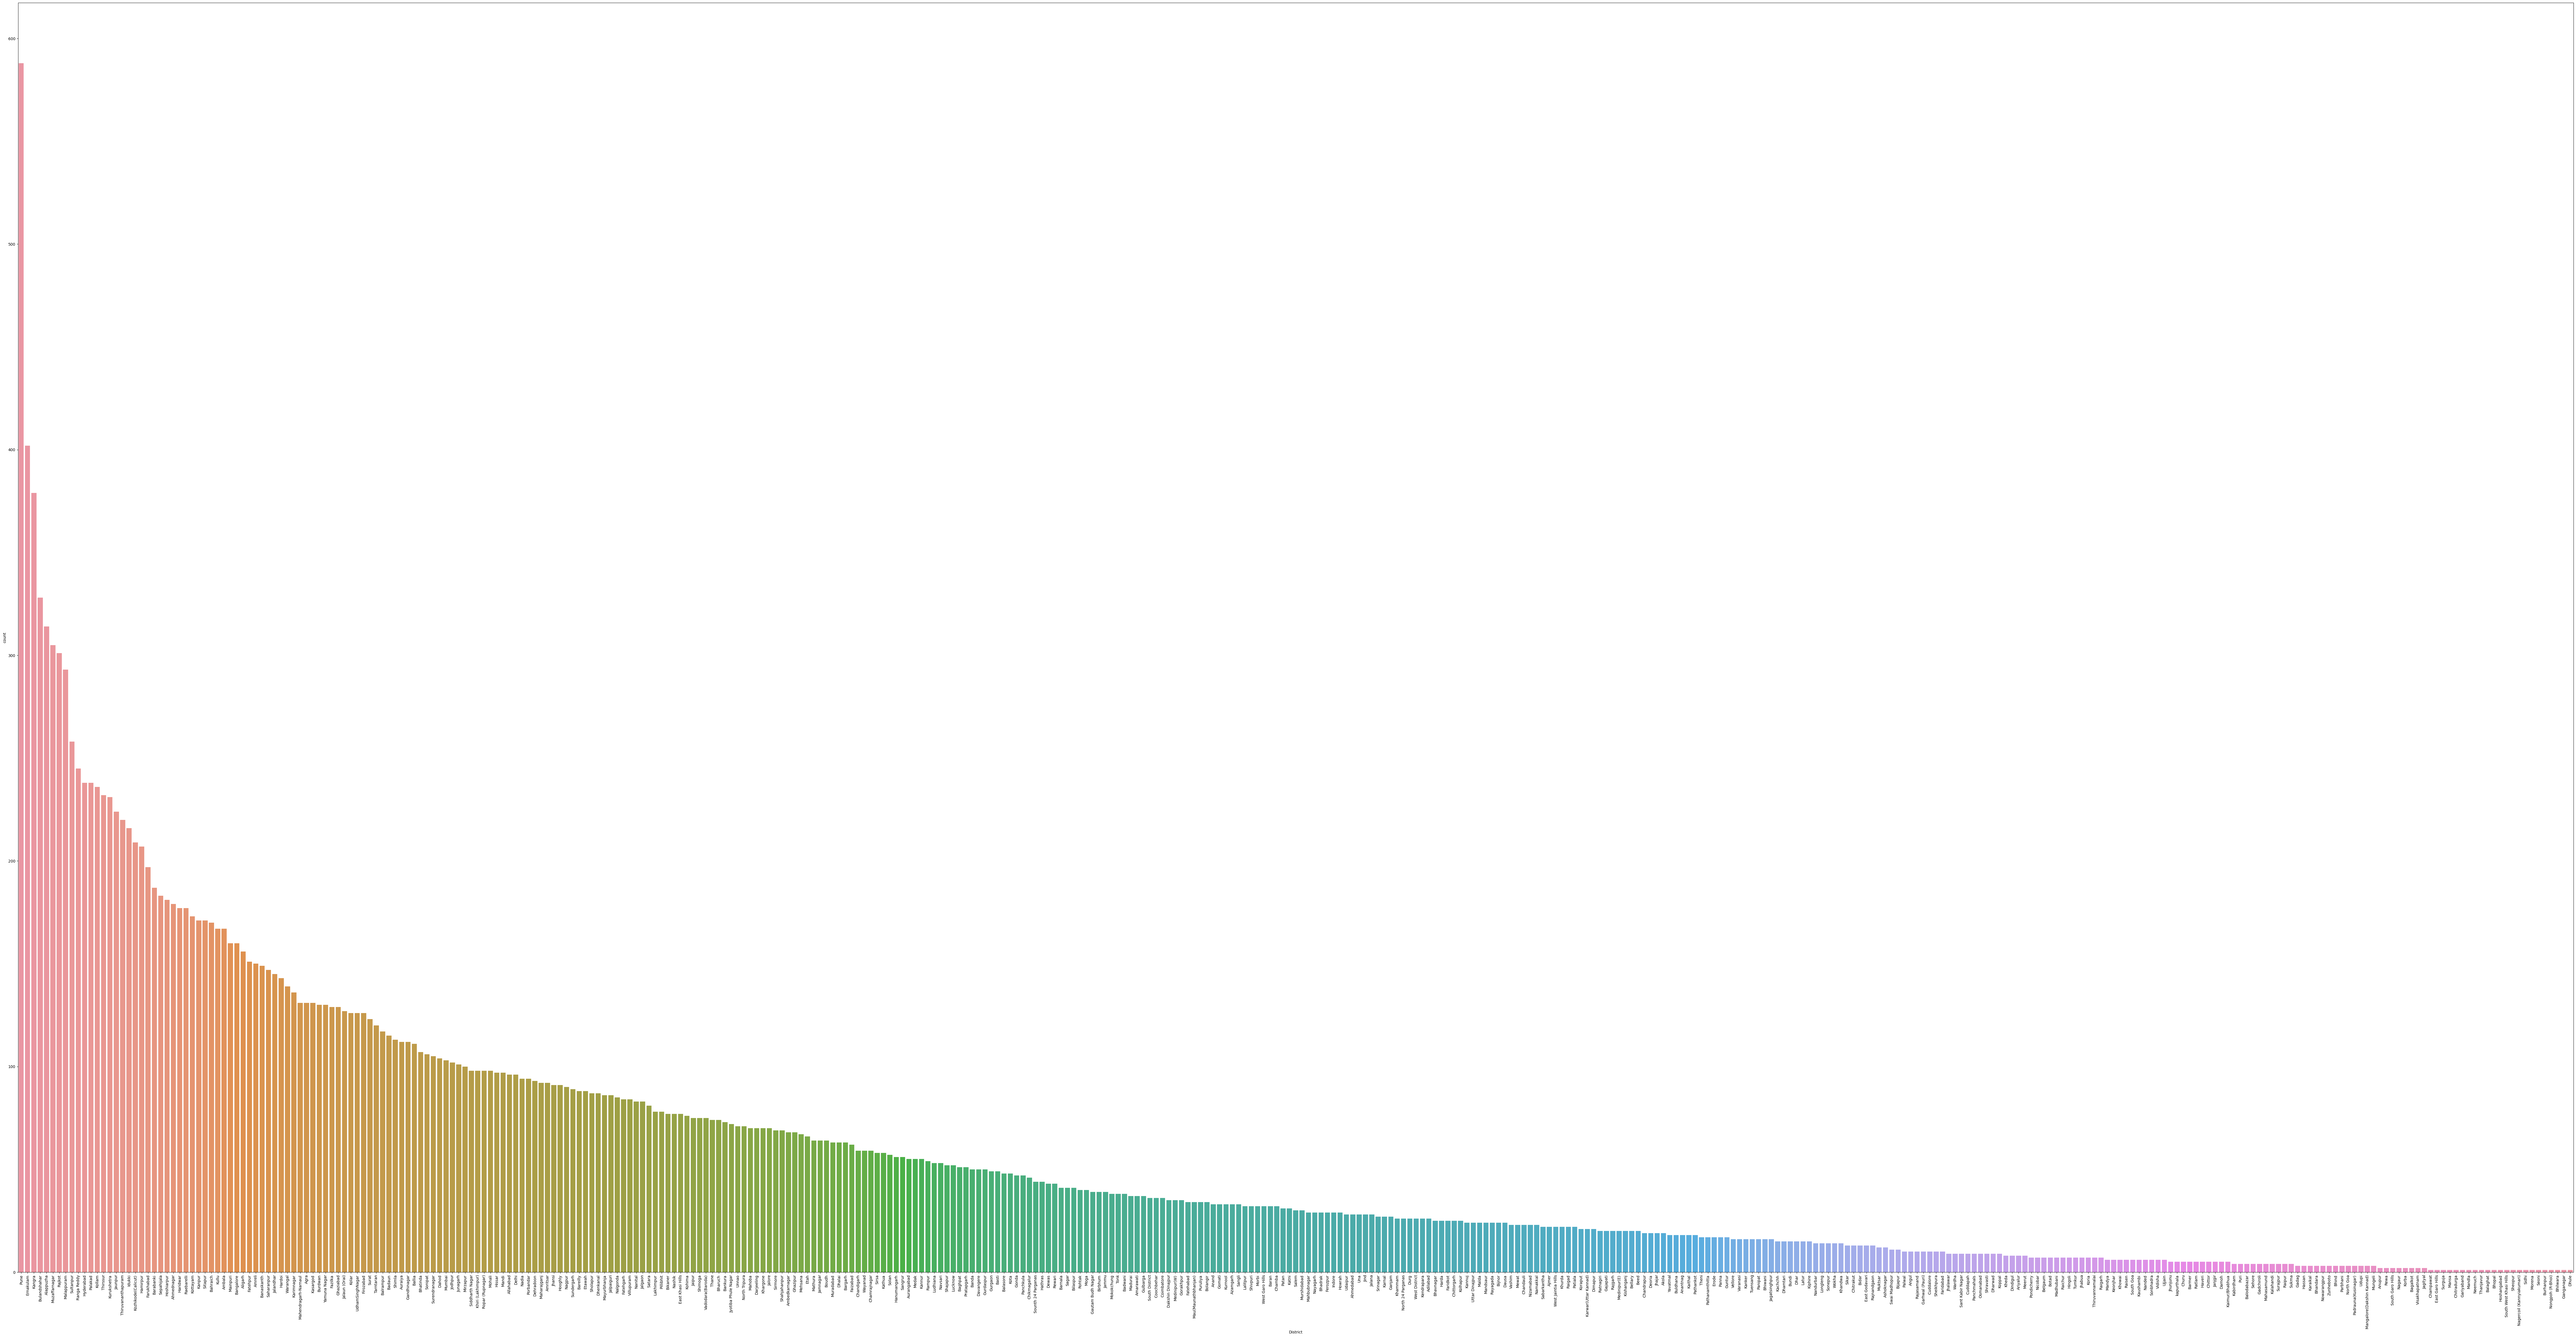

In [184]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (120, 60)
sns.countplot(x=dataset["District"],order=dataset.District.value_counts().index)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

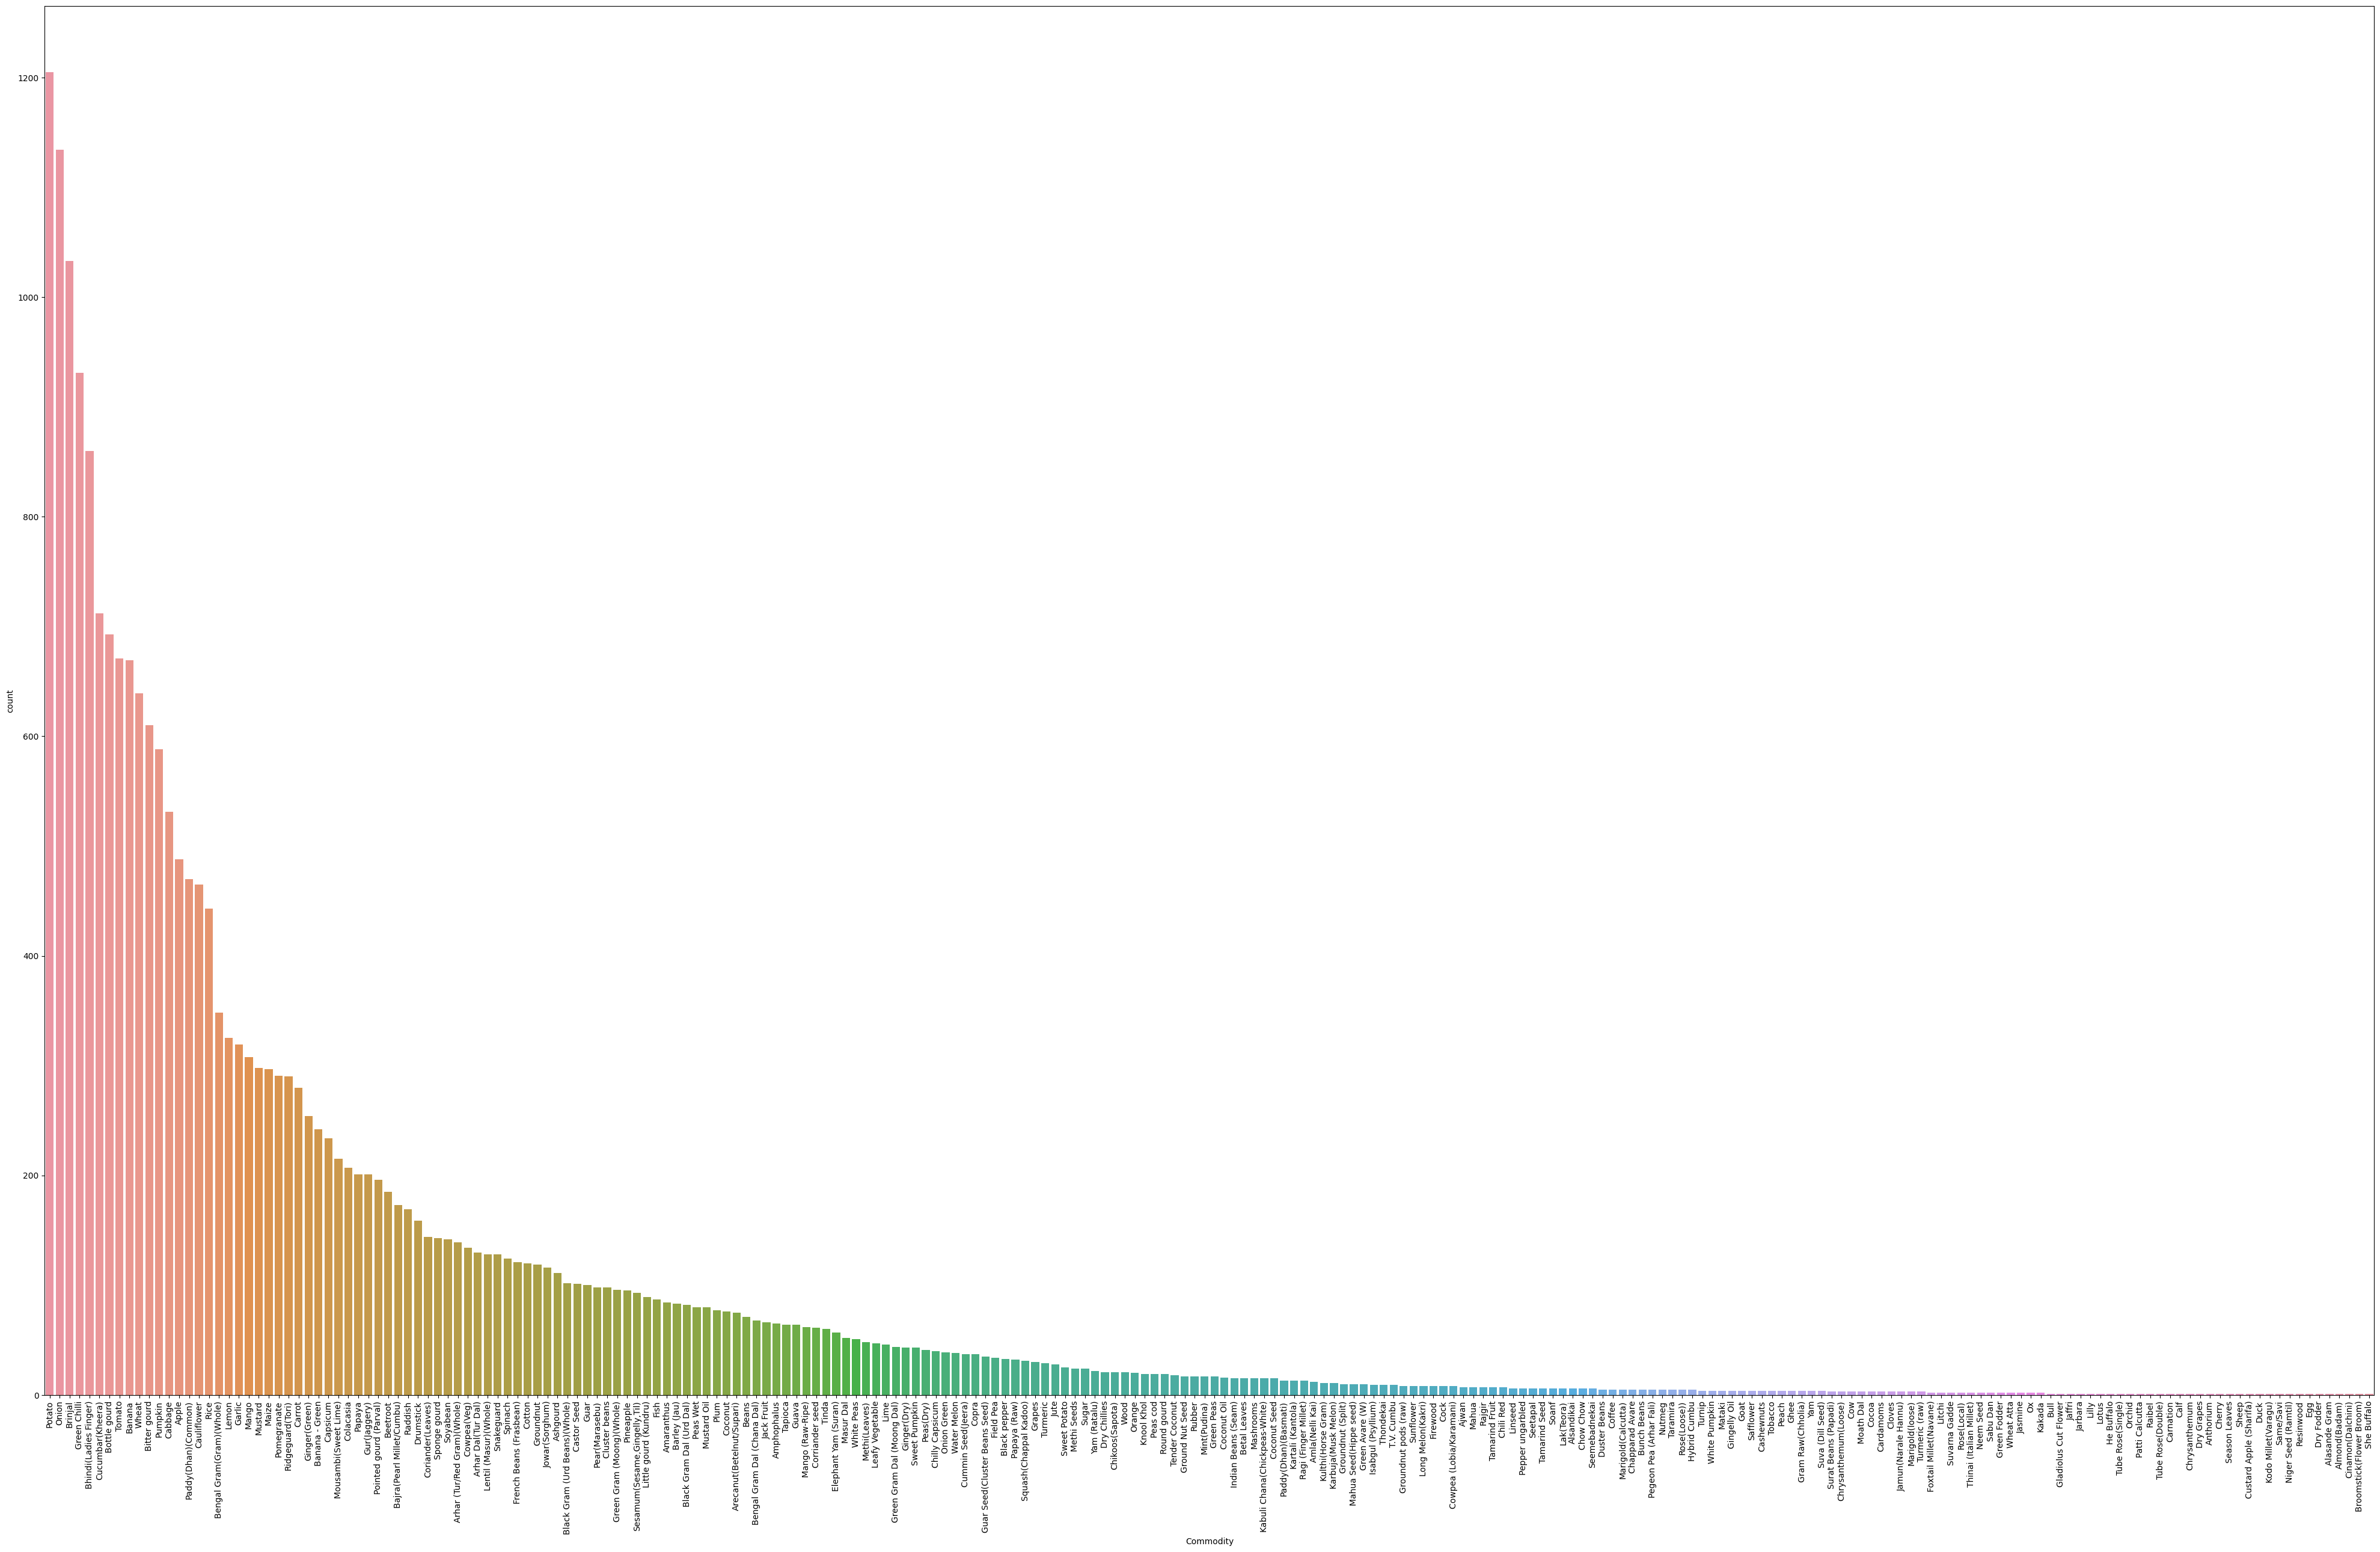

In [185]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (50, 30)
sns.countplot(x=dataset["Commodity"],order=dataset.Commodity.value_counts().index)
plt.xticks(rotation=90)

In [186]:
dataset.isnull().sum()

State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
Min Price       0
Max Price       0
Modal Price     0
dtype: int64

In [187]:
dataset.drop(columns=['Arrival_Date'], inplace=True)
dataset.drop(columns=['Variety'], inplace=True)

In [188]:
dataset.head(10)

,State,District,Market,Commodity,Grade,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),FAQ,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,FAQ,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,FAQ,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,FAQ,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),FAQ,8400.0,9000.0,8850.0
5,Gujarat,Amreli,Damnagar,Ginger(Green),FAQ,11000.0,14000.0,12500.0
6,Gujarat,Amreli,Damnagar,Green Chilli,FAQ,7200.0,8000.0,7550.0
7,Gujarat,Amreli,Damnagar,Guar,FAQ,6800.0,7500.0,7350.0
8,Gujarat,Amreli,Damnagar,Lemon,FAQ,1850.0,2550.0,2200.0
9,Gujarat,Amreli,Damnagar,Tomato,FAQ,9800.0,10000.0,9950.0


In [189]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        23093 non-null  object 
 1   District     23093 non-null  object 
 2   Market       23093 non-null  object 
 3   Commodity    23093 non-null  object 
 4   Grade        23093 non-null  object 
 5   Min Price    23093 non-null  float64
 6   Max Price    23093 non-null  float64
 7   Modal Price  23093 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.4+ MB


In [190]:

dataset.describe()

,Min Price,Max Price,Modal Price
count,23093.000000,23093.000000,23093.000000
mean,4187.077045,4976.034260,4602.917742
std,5472.783385,6277.308057,5843.822711
min,0.000000,0.000000,0.830000
25%,1750.000000,2000.000000,1955.000000
50%,2725.000000,3400.000000,3000.000000
75%,5000.000000,6000.000000,5500.000000
max,223500.000000,227500.000000,225500.000000


In [191]:
dataset[dataset["Grade"]=="FAQ"]

,State,District,Market,Commodity,Grade,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),FAQ,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,FAQ,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,FAQ,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,FAQ,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),FAQ,8400.0,9000.0,8850.0
...,...,...,...,...,...,...,...,...
23085,Uttrakhand,Haridwar,Roorkee,Bottle gourd,FAQ,600.0,1000.0,800.0
23086,Uttrakhand,Haridwar,Roorkee,Cucumbar(Kheera),FAQ,800.0,1200.0,1000.0
23087,Uttrakhand,Haridwar,Roorkee,Green Chilli,FAQ,2000.0,3000.0,2500.0
23091,Uttrakhand,Haridwar,Roorkee,Potato,FAQ,900.0,1800.0,1500.0


In [192]:
dataset['Grade'].unique()

array(['FAQ', 'Large', 'Medium', 'Small'], dtype=object)

**PRICE_PREDICTION_MODEL**

In [193]:
grade_mapping = {'Small': 1, 'Medium': 2, 'Large': 3, 'FAQ' : 4}
dataset['Grade'] = dataset['Grade'].map(grade_mapping)

In [194]:

X = dataset[['Min Price', 'Max Price', 'Grade']]
y = dataset['Modal Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
dataset.columns

Index(['State', 'District', 'Market', 'Commodity', 'Grade', 'Min Price',
       'Max Price', 'Modal Price'],
      dtype='object')

In [196]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [197]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
linear_rmse = linear_mse ** 0.5
linear_r2,linear_mse,linear_rmse

(0.9929101691360734, 329515.32333145256, 574.0342527510467)

In [198]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)
tree_rmse=tree_mse ** 0.5
tree_r2,tree_mse,tree_rmse

(0.9653312515473188, 1611305.5551166115, 1269.3721105793256)

In [199]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)
forest_rmse=forest_mse ** 0.5
forest_r2,forest_mse,forest_rmse

(0.9603547803754938, 1842597.8861617818, 1357.4232524020583)

In [200]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
gb_rmse=gb_mse ** 0.5
gb_r2,gb_mse,gb_rmse

(0.9661132916550244, 1574958.5386793185, 1254.9735211068473)

In [201]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
svr_rmse = svr_mse ** 0.5
svr_r2,svr_mse,svr_rmse

(0.16805568797780013, 38666422.96991736, 6218.233106752862)

In [202]:
print('Linear Regression - R-squared:', linear_r2)
print('Decision Tree Regression - R-squared:', tree_r2)
print('Random Forest Regression - R-squared:', forest_r2)
print('Gradient Boosting Regression - R-squared:', gb_r2)
print('Support Vector Regression (SVR) - R-squared:', svr_r2)

Linear Regression - R-squared: 0.9929101691360734
Decision Tree Regression - R-squared: 0.9653312515473188
Random Forest Regression - R-squared: 0.9603547803754938
Gradient Boosting Regression - R-squared: 0.9661132916550244
Support Vector Regression (SVR) - R-squared: 0.16805568797780013


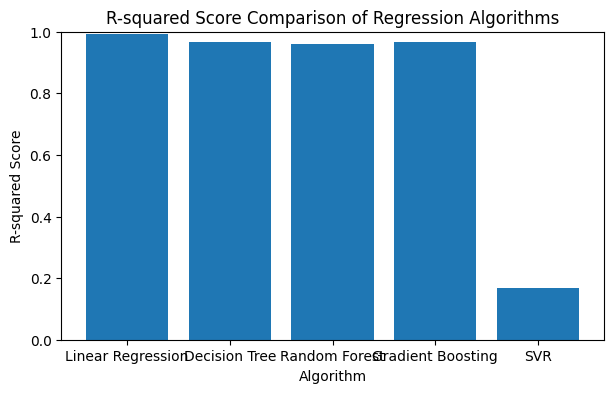

In [203]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']
r2_scores = [linear_r2, tree_r2, forest_r2, gb_r2, svr_r2]
matplotlib.rcParams['figure.figsize'] = (7, 4)
plt.bar(models, r2_scores)
plt.xlabel('Algorithm')
plt.ylabel('R-squared Score')
plt.title('R-squared Score Comparison of Regression Algorithms')
plt.ylim([0, 1]) 
plt.show()

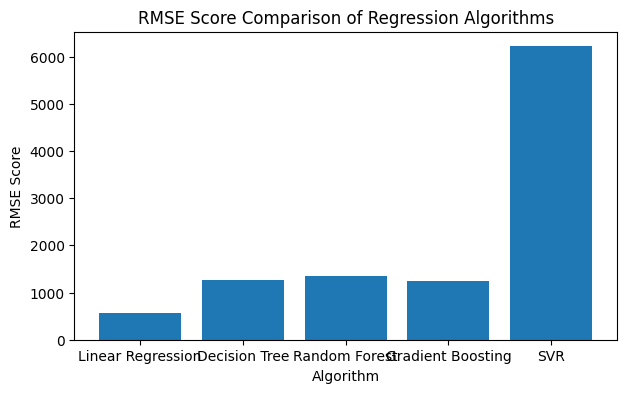

In [204]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']
rmse_scores = [linear_rmse, tree_rmse, forest_rmse, gb_rmse, svr_rmse]
matplotlib.rcParams['figure.figsize'] = (7, 4)
plt.bar(models, rmse_scores)
plt.xlabel('Algorithm')
plt.ylabel('RMSE Score')
plt.title('RMSE Score Comparison of Regression Algorithms')
plt.show()

Hence, Linear Regression is best for this!!****

**RECOMMENDER_SYSTEM_**

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
# Load dataset
df = pd.read_csv('Price.csv')

Recommendations for Rice :
123     Rice
3414    Rice
3461    Rice
3479    Rice
8136    Rice
Name: Commodity, dtype: object


In [ ]:
# Fix column names (remove spaces)
df.columns = df.columns.str.replace(" ", "_")

# Select relevant features for recommendation
features = ["Commodity", "Variety", "Grade"]

# Create a content-based representation of commodities
df["Content"] = df[features].apply(lambda x: " ".join(x.dropna().astype(str)).lower(), axis=1)

In [ ]:
# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
commodity_matrix = vectorizer.fit_transform(df["Content"])

In [ ]:
# Compute the cosine similarity matrix
cosine_similarities = linear_kernel(commodity_matrix, commodity_matrix)

In [ ]:
# Function to get Market, State, and District recommendations
def get_market_recommendations(commodity, variety, grade, top_k=5):
    input_query = f"{commodity} {variety} {grade}".lower()

    # Transform the input query using the same vectorizer
    query_vector = vectorizer.transform([input_query])

    # Compute similarity scores with all records
    sim_scores = linear_kernel(query_vector, commodity_matrix).flatten()

    # Get the top-k indices (excluding exact matches)
    top_indices = sim_scores.argsort()[-(top_k + 1):-1][::-1]

    # Extract market, state, and district recommendations
    recommendations = df.iloc[top_indices][["Market", "State", "District"]]

    return recommendations

In [ ]:
# Local Testing
commodity = "Rice"
variety = "Basmati"
grade = "A"

recommendations = get_market_recommendations(commodity, variety, grade, top_k=5)

if not recommendations.empty:
    print(f"Recommended markets for {commodity} ({variety}, {grade}):")
    print(recommendations)
else:
    print("No recommendations found. Try a different input.")


Recommended markets for Rice (Basmati, A):
             Market          State      District
5517       Siliguri    West Bengal    Darjeeling
8867       Siliguri    West Bengal    Darjeeling
20772  Jahangirabad  Uttar Pradesh  Bulandshahar
21025         Hapur  Uttar Pradesh     Ghaziabad
3977         Khurja  Uttar Pradesh  Bulandshahar
